In [1]:
from IPython.core.display import HTML

In [2]:
%matplotlib inline
from matplotlib import style
style.use('ggplot')

This example is a modified version of the inset example from the
[geophysique](http://www.geophysique.be/2010/05/05/matplotlib-basemap-tutorial-part-03-masked-arrays-zoom/) blog.

We need to import `Basemap`, `Polygon` and `inset_axes`:

In [3]:
import numpy as np
import numpy.ma as ma
from oceans.datasets import etopo_subset
import os
from cmocean import cm
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from PyFVCOM.read import ncread
from matplotlib.patches import Polygon
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from matplotlib import style
style.use('ggplot')

Now we can define functions to generate the plot:

In [33]:
def circle(x, y,ax, radius=15,fc = 'w'):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground=fc)])
    ax.add_artist(circle)


def text(x, y, text, ax):
    ax.text(x, y, text, backgroundcolor=(1, 1, 1, 0.7),
            ha='center', va='top', weight='bold', color='blue')

def map_limits(m):
    llcrnrlon = min(m.boundarylons)
    urcrnrlon = max(m.boundarylons)
    llcrnrlat = min(m.boundarylats)
    urcrnrlat = max(m.boundarylats)
    return llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat

def make_map(llcrnrlon=-49, urcrnrlon=-39, llcrnrlat=-30, urcrnrlat=-21,
             projection='merc', resolution='i', figsize=(6, 6), inset=True):
    m = Basemap(llcrnrlon=llcrnrlon, urcrnrlon=urcrnrlon,
                llcrnrlat=llcrnrlat, urcrnrlat=urcrnrlat,
                projection=projection, resolution=resolution)
    fig, ax = plt.subplots(figsize=figsize)
    m.drawstates()
    m.drawcoastlines()
    m.fillcontinents(color='0.85')
    meridians = np.arange(llcrnrlon, urcrnrlon + 2, 1)
    parallels = np.arange(llcrnrlat, urcrnrlat + 1, 1)
    m.drawparallels(parallels, linewidth=0, labels=[1, 0, 0, 0])
    m.drawmeridians(meridians, linewidth=0, labels=[0, 0, 0, 1])
    m.llcrnrlon = llcrnrlon
    m.urcrnrlon = urcrnrlon
    m.llcrnrlat = llcrnrlat
    m.urcrnrlat = urcrnrlat
    m.ax = ax

    if inset:
        axin = inset_axes(m.ax, width="30%", height="30%", bbox_to_anchor=(0, 0, .8, .8),bbox_transform=ax.transAxes,loc=2)
        # Global inset map.
        #inmap = Basemap(projection='ortho', lon_0=-44.5, lat_0=-25.5,
         #               ax=axin, anchor='NE')
       # m1 = Basemap(projection='ortho', lon_0=114.5, lat_0=-32,
                       # ax=axin, anchor='NE')
        h = 5000.
        inmap = Basemap(projection='nsper',lon_0=130,lat_0=-25,satellite_height=h*1000.,resolution='l',ax=axin, anchor='NE')
       
        #inmap = Basemap(projection='ortho',lon_0=114.5,lat_0=-32,llcrnrx=0.,llcrnry=0.,urcrnrx=m1.urcrnrx/2.,urcrnry=m1.urcrnry/2.)
        inmap.drawcountries(color='white')
        inmap.fillcontinents(color='0.7')
        bx, by = inmap(m.boundarylons, m.boundarylats)
        xy = list(zip(bx, by))
        #print(bx)
        mapboundary = Polygon(xy, edgecolor='k', linewidth=1, fill=False)
        
        inmap.ax.add_patch(mapboundary)
        #inmap.drawparallels([-40,-20,0])
        #inmap.drawmeridians([120,140,160])
        
        
    return fig, m

In [31]:
# Load the model output.
fvcom = os.path.join(os.getcwd()[:-14],'data', 'OUTPUT','cockburn_0001.nc')
#fvcom = 'cockburn_0001.nc'

# Extract only the first 20 time steps.
dims = {'time': ':20'}

# And only these variables
varlist = ('lon', 'lat', 'nv', 'zeta', 'Times','h')
FVCOM = ncread(fvcom, vars=varlist, dims=dims, noisy=True)

File format: NETCDF3_64BIT_OFFSET
Found nprocs 
Found partition 
Found x 
Found y 
Found lon (extracted [0:30323])
Found lat (extracted [0:30323])
Found xc 
Found yc 
Found lonc 
Found latc 
Found siglay 
Found siglev 
Found siglay_center 
Found siglev_center 
Found h_center 
Found h (extracted [0:30323])
Found nv (extracted [0:3, 0:59203])
Found iint 
Found time 
Found Itime 
Found Itime2 
Found Times (extracted [:20, 0:26])
Found zeta (extracted [:20, 0:30323])
Found nbe 
Found ntsn 
Found nbsn 
Found ntve 
Found nbve 
Found a1u 
Found a2u 
Found aw0 
Found awx 
Found awy 
Found art2 
Found art1 
Found u 
Found v 
Found tauc 
Found ua 
Found va 
Found temp 
Found salinity 
Found short_wave 
Found net_heat_flux 
Found uwind_speed 
Found vwind_speed 
Found wet_nodes 
Found wet_cells 
Found wet_nodes_prev_int 
Found wet_cells_prev_int 
Found wet_cells_prev_ext 


And here the result:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead. (C:\ProgramData\Anaconda3\envs\IOOS\lib\site-packages\ipykernel_launcher.py:25)

The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead. (C:\ProgramData\Anaconda3\envs\IOOS\lib\site-packages\ipykernel_launcher.py:27)

The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead. (C:\ProgramData\Anaconda3\envs\IOOS\lib\site-packages\ipykernel_launcher.py:48)

The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead. (C:\ProgramData\Anaconda3\envs\IOOS\lib\site-packages\ipykernel_launcher.py:51)


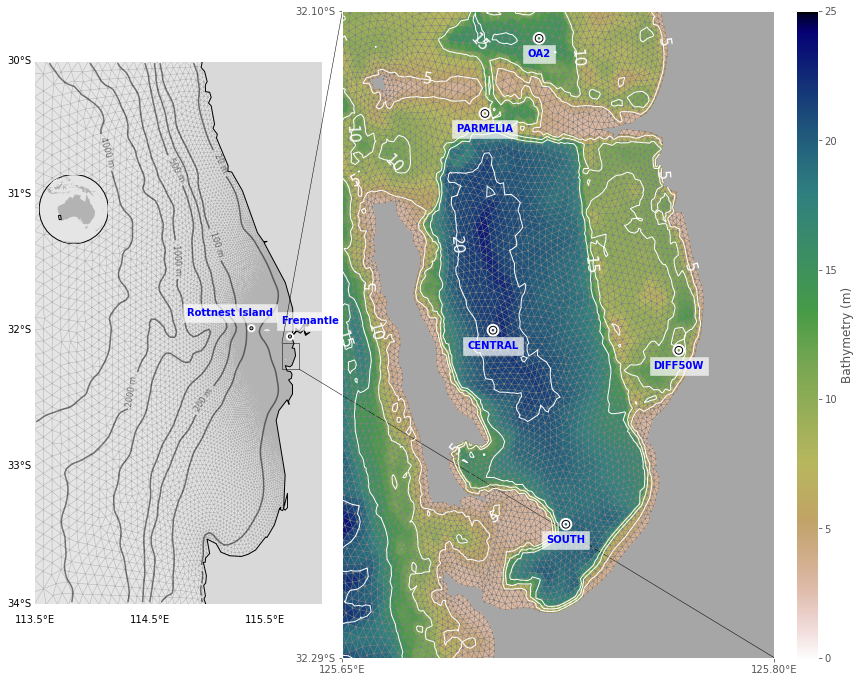

In [35]:
#extents = np.array((115.65,115.8,-32.29,-32.11))
#fig, m = make_map(llcrnrlon=-48, urcrnrlon=-41.5, llcrnrlat=-27,
 #                 urcrnrlat=-22.5, figsize=(5, 6))
fig, m = make_map(llcrnrlon=113.5, urcrnrlon=116, llcrnrlat=-34,
                  urcrnrlat=-30, figsize=(20, 10))



stationsname = ['DIFF50W','SOUTH','CENTRAL','PARMELIA','OA2']
wanwai_name = ['Fremantle','Rottnest Island']
stations = {'DIFF50W':m(115.7668,-32.1997),
            'SOUTH':m(115.7276,-32.2508),
            'CENTRAL':m(115.7023,-32.1938),
            'PARMELIA':m(115.6995,-32.1301),
            'OA2':m(115.7183,-32.1080),
           'Fremantle': m(115.72,-32.05),
           'Rottnest Island':m(115.3855,-31.9895)}
# Topography.
lon, lat, topo = etopo_subset(map_limits(m), smoo=True)
topo = np.where(topo > -1., 1.e10, topo)
topo = ma.masked_values(topo, 1.e10)

triangles = FVCOM['nv'].transpose() - 1  # offset for Python indexing.

x, y = m(FVCOM['lon'], FVCOM['lat'])
mesh_plot = m.ax.triplot(x, y, triangles, color='0.7', linewidth=0.5, zorder=0)
cs = m.contour(lon, lat, -topo, (20, 100, 200, 500, 1000,2000,4000), colors='k',
                latlon=True, alpha=0.5)

_ = m.ax.clabel(cs, fmt='%1.0f m', fontsize=8, inline=1)
for i in wanwai_name:
    a = 0.9
    if stations[i][1]*2<stations['Fremantle'][1]+stations['Rottnest Island'][1]:
        a = 1.08
    circle(stations[i][0],stations[i][1],m.ax,radius=1500)
    text(stations[i][0]*a,stations[i][1]+20000, i,m.ax)
#mesh_plot.set_zorder(0)
#m.ax.draw()

        #print(bx)
#zoomed 2
extents = np.array((115.65,
                    115.8,
                    -32.29,
                    -32.1))



axins_2 = zoomed_inset_axes(m.ax, 25,  loc=5,
                     bbox_to_anchor=(0.93, 0.5),
                     bbox_transform=m.ax.figure.transFigure)


#axins_2.axis([125.65,125.8,-32.29,-32.11])
axins_2.set_xlim(239068.97971207, 255748.21085477)
axins_2.set_ylim(227109.38164618, 252075.17365482)
#axins_2.axis([239068.97971207, 255748.21085477, 227109.38164618, 250762.48229915])

#m2 = Basemap(llcrnrlon=125.65, urcrnrlon=125.8, llcrnrlat=-32.29, urcrnrlat=-32.11,ax=axins_2,
 #           projection='merc')

#axins_2.set_axis_bgcolor('none')


axins_2.set_xticks([239068.97971207, 255748.21085477])
axins_2.set_xticklabels(['125.65°E','125.80°E'])
axins_2.set_yticks([227109.38164618, 252075.17365482])
axins_2.set_yticklabels(['32.29°S','32.10°S'])

axins_2.triplot(x, y, triangles, color='0.5', linewidth=0.5)
bounds=np.linspace(0,26,6)
axins_2.patch.set_facecolor('0.65')
tp2 = axins_2.tricontour(x, y, triangles, FVCOM['h'], levels=bounds,colors='w', linewidths=1.0)
plt.clabel(tp2,bounds, fontsize=15, inline_spacing=0, inline=False, fmt='%d')
tp = axins_2.tripcolor(x, y, triangles, FVCOM['h'],cmap=plt.cm.gist_earth_r)
tp.set_clim(0, 25)



#m.ax.add_patch(mapboundary)
axes = mark_inset(m.ax, axins_2, loc1=2, loc2=4, ec="0")

parallels = np.arange(np.floor(extents[2]), np.ceil(extents[3]), 0.05)
meridians = np.arange(np.floor(extents[0]), np.ceil(extents[1]), 0.05)
# Colorbar
cax = inset_axes(axins_2,
                 width="5%",  # width = 10% of parent_bbox width
                 height="100%",  # height : 50%
                 loc='lower left',
                 bbox_to_anchor=(1.05, 0., 1, 1),
                 bbox_transform=axins_2.transAxes,
                 borderpad=0,
                 )
cb = fig.colorbar(tp,cax=cax)
cb.set_label("Bathymetry (m)")

# Plot station
for i in stationsname:
    circle(stations[i][0],stations[i][1],axins_2,radius=150)
    text(stations[i][0],stations[i][1]-400, i,axins_2)
   # axins_2.scatter(stations[i][0],stations[i][1],label=i) #
    
#axins_2.legend()

plt.savefig('./final_depth_loc.png',dpi=200)
